In [4]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [5]:
from src.models.propensity_scores.nlp.basic import get_data

y = get_data().y
pos = y.sum()
neg = len(y) - pos
print(f"Positive: {pos}, Negative: {neg}")
# calculate expected f1 score for random guessing
from sklearn.metrics import f1_score

f1_score(y, [1] * len(y))

Positive: 890, Negative: 13267


In [6]:
from src.models.propensity_scores.nlp.basic import (
    f1_augmented,
    f1_combi,
    f1_text,
    f1_ts,
)

f1_ts()
# f1_text(cutoff=1000)
# f1_combi(cutoff=1000)
# f1_augmented(cutoff=1000)

Cross-validated F1 score: 0.185 +/- 0.060
Cross-validated F1 score: 0.157 +/- 0.060


In [1]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")

In [1]:
from src.models.propensity_scores.nlp.basic import get_data

d = get_data()
texts = d._X_text["text_lag0"]

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for de

In [3]:
import re
from pprint import pprint

from src.models.propensity_scores.nlp.kwic import kwic

regex = re.compile(r"klima|climate|protest", re.IGNORECASE)

texts = texts.sample(100).apply(lambda text: kwic(text, regex, n=0))
pprint(texts.sample(5).tolist())

['\n'
 '...\n'
 'Wenn 90 Prozent des in Deutschland für das Ziel der Klimaneutralität '
 'benötigten Wasserstoffs aus heimischer Produktion kämen, seien im Jahr 2050 '
 'mehr als 800\n'
 '...\n'
 '000 zusätzliche Arbeitsplätze und Wertschöpfungseffekte von bis zu maximal '
 '30 Milliarden Euro möglich, heißt es in der gestern vorgestellten '
 'Untersuchung des Wuppertal Instituts für Klima, Umwelt, Energie und des '
 'Beratungsunternehmens DIW Econ. \n'
 '...\n'
 '\n'
 '\n'
 '---\n'
 '\n'
 'Wettbewerb für grüne Schulhöfe\n'
 '\n'
 'Das Ministerium für Landwirtschaft, Umwelt und Klimaschutz des Landes '
 'Brandenburg und die Deutsche Umwelthilfe (DUH) starten gemeinsam den neuen '
 "Wettbewerb &quot;Zehn grüne Schulhöfe für Brandenburg'. Ziel ist, Schulhöfe "
 'in naturnahe, klimagerechte, nachhaltig soziale und attraktive Lebens- und '
 'Lernräume zu verwandeln, heißt es in einer Mitteilung des Brandenburger '
 'Ministeriums für Landwirtschaft, Umwelt und Klimaschutz.\n'
 '...\n'
 'Der

<Axes: >

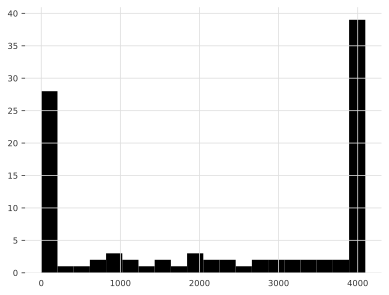

In [11]:
(
    texts.sample(100)
    .apply(lambda x: len(tokenizer.tokenize(x)))
    .clip(0, 4096)
    .hist(bins=20)
)

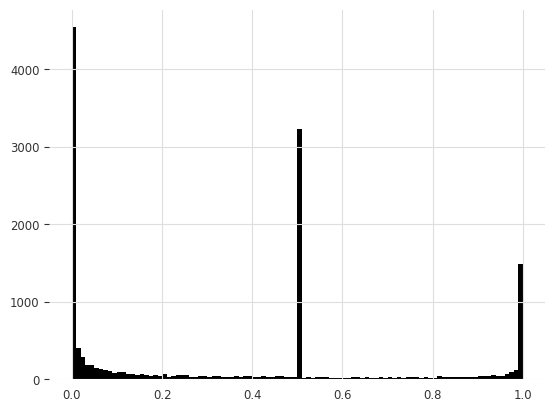

In [8]:
import matplotlib.pyplot as plt

from src.models.propensity_scores.nlp.basic import get_text_probas

X_text_proba = get_text_probas(cutoff=500)
plt.hist(X_text_proba[:, 1], bins=100)
plt.show()

In [13]:
proba = X_text_proba[:, 0]
sum((proba < 0.95) & (proba > 0.5)) / len(proba)

In [ ]:
df["text_lag-1"].str.split().str.len().describe()

count    14157.000000
mean      2054.008264
std       1394.894754
min          0.000000
25%        873.000000
50%       2008.000000
75%       2954.000000
max       7889.000000
Name: text_lag-1, dtype: float64

In [7]:
from src.features.aggregation import all_regions

{name: df["occ_protest"].iloc[:60].sum() for name, df in all_regions(ignore_group=True)}

{'Bayern': 14,
 'Berlin': 9,
 'Brandenburg': 0,
 'Hamburg': 9,
 'Hessen': 7,
 'Niedersachsen': 7,
 'Nordrhein-Westfalen': 16,
 'Rheinland-Pfalz': 2,
 'Saarland': 0,
 'Sachsen': 2,
 'Sachsen-Anhalt': 1,
 'Schleswig-Holstein': 3,
 'Thüringen': 6}

In [3]:
from src.models.propensity_scores.nlp.basic import get_data

d = get_data()
d._X_text["text_lag0"].sample(5).tolist()

['',
 '',
 'So wird ein Hassbürger zum Mörder\n\nRechtsextreme Gewalt ist die größte Gefahr für die innere Sicherheit Deutschlands. Diese Gewalt entsteht aus einem Klima von Hass und Hetze gegen Ausländer, gegen religiöse Minderheiten und gegen verantwortliche Politiker. So werden potenzielle Täter ermutigt, zu handeln. So werden aus Wutbürgern Hassbürger und schließlich Mörder. Die Sicherheitsbehörden haben das erkannt. Sie bekamen mehr Stellen und es gibt neue Gesetze gegen Hass im Internet.\n\n---\n\n"Rassismus ist ein Gift, Hass ist ein Gift"\n\nDie AfD bezeichnete Klingbeil dabei als "politischen Arm der extremen Rechten". Von der AfD ausgehende Tabubrüche seien nicht mehr akzeptabel, so der SPD-General. "Wir werden nicht hinnehmen, dass das gesellschaftliche Klima sich weiter vergiftet." Auch für CDU-Chefin Annegret Kramp-Karrenbauer zeigt die Gewalttat von Hanau, wie nötig eine "Brandmauer" gegen die AfD ist. Sie fühle sich in ihrer Haltung bestärkt, dass es keine Zusammenarbeit

In [1]:
from src.models.propensity_scores.nlp.embeddings import (
    f1_embeddings,
    precision_recall_curve,
)

f1_embeddings(cutoff=200)
# precision_recall_curve()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for de

0it [00:00, ?it/s]

Model trained


  0%|          | 0/4000 [00:00<?, ?it/s]

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Cross-validated F1 score: 0.139 +/- 0.084


input lenghts:

- electra: 128 tokens
- bert: 512 tokens
- llama 2: 4096 tokens